In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


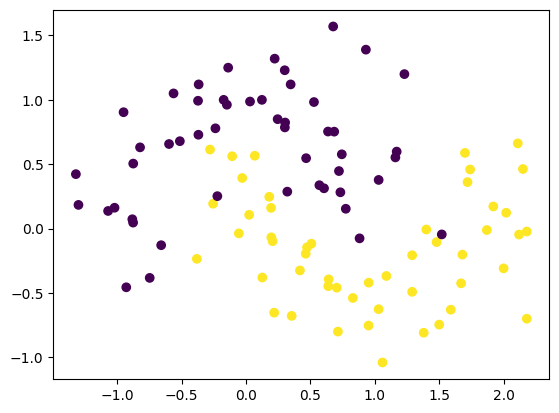

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# (a) Zero Weight Initialization

# For Relu

In [7]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Set parameters to 0
model.get_weights()

[array([[ 0.42809117, -0.9590824 ],
        [-0.97002196,  0.7839314 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.1703316],
        [-1.2535386]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.3313 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5352 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [15]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00039122], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

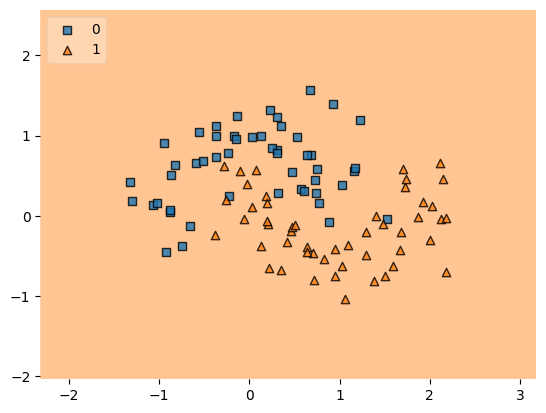

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# For Tanh

In [17]:
model1 = Sequential()

model1.add(Dense(2,activation='tanh',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Set parameters to 0
model1.get_weights()

[array([[-0.8061085 ,  0.5526817 ],
        [ 0.21053803, -0.44633168]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.5880996],
        [ 1.0836102]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
initial_weights = model.get_weights()

In [20]:
initial_weights[0] = np.zeros(model1.get_weights()[0].shape)
initial_weights[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights[2] = np.zeros(model1.get_weights()[2].shape)
initial_weights[3] = np.zeros(model1.get_weights()[3].shape)

In [21]:
model1.set_weights(initial_weights)

In [22]:
model1.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history = model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5078 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [25]:
model1.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.01034912], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

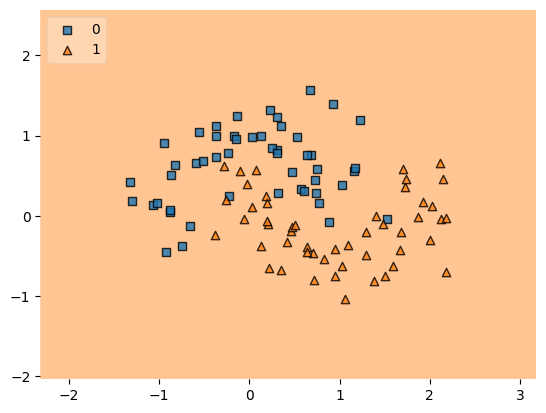

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

# for Sigmoid

In [27]:
model2 = Sequential()

model2.add(Dense(10,activation='sigmoid',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Set parameters to 0
model2.get_weights()

[array([[ 0.3128088 ,  0.36965007, -0.01311696, -0.04655254,  0.24660641,
          0.33130556, -0.5627007 ,  0.00661081, -0.33524665, -0.14769536],
        [ 0.15020245, -0.14079845,  0.3860199 ,  0.70597035, -0.4721986 ,
         -0.23729652,  0.46182293, -0.00483054, -0.40160805,  0.01082569]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.41235465],
        [ 0.09393084],
        [-0.00599742],
        [-0.46853483],
        [-0.10632539],
        [ 0.47048265],
        [ 0.2561602 ],
        [ 0.08720392],
        [-0.5615775 ],
        [-0.51619494]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
initial_weights = model2.get_weights()

In [30]:
initial_weights[0] = np.ones(model2.get_weights()[0].shape)
initial_weights[1] = np.ones(model2.get_weights()[1].shape)
initial_weights[2] = np.ones(model2.get_weights()[2].shape)
initial_weights[3] = np.ones(model2.get_weights()[3].shape)

In [31]:
model2.set_weights(initial_weights)

In [32]:
model2.get_weights()

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [33]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5234 - loss: 4.3759 - val_accuracy: 0.5000 - val_loss: 4.0672
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4961 - loss: 4.6240 - val_accuracy: 0.5000 - val_loss: 4.0504
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4844 - loss: 4.7956 - val_accuracy: 0.5000 - val_loss: 4.0337
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5117 - loss: 4.4396 - val_accuracy: 0.5000 - val_loss: 4.0171
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5039 - loss: 4.5604 - val_accuracy: 0.5000 - val_loss: 4.0005
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4766 - loss: 4.7677 - val_accuracy: 0.5000 - val_loss: 3.9840
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5234 - loss: 4.2867 - val_accuracy: 0.5000 - val_loss: 3.9675
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 4.5379 - val_accuracy: 0.5000 - val_loss

In [35]:
model2.get_weights()

[array([[1.1704836 , 1.1704836 , 1.1704836 , 1.1704836 , 1.1704836 ,
         1.1704836 , 1.1704836 , 1.1704836 , 1.1704836 , 1.1704836 ],
        [0.70672196, 0.70672196, 0.70672196, 0.70672196, 0.70672196,
         0.70672196, 0.70672196, 0.70672196, 0.70672196, 0.70672196]],
       dtype=float32),
 array([0.7133868, 0.7133868, 0.7133868, 0.7133868, 0.7133868, 0.7133868,
        0.7133868, 0.7133868, 0.7133868, 0.7133868], dtype=float32),
 array([[0.7098674],
        [0.7098674],
        [0.7098674],
        [0.7098674],
        [0.7098674],
        [0.7098674],
        [0.7098674],
        [0.7098674],
        [0.7098674],
        [0.7098674]], dtype=float32),
 array([0.7043694], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

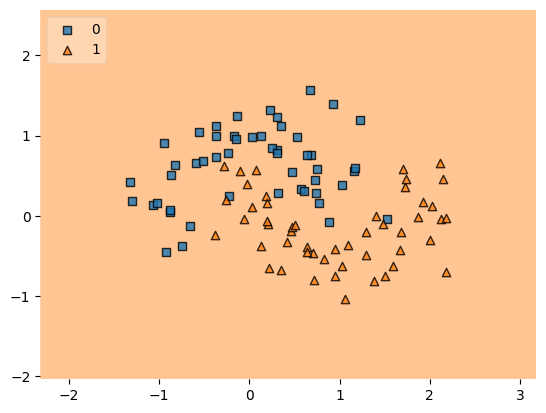

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)

# (b) Non Zero  Constant nitialization

In [37]:
model3 = Sequential()

model3.add(Dense(2,activation='relu',input_dim=2))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Set parameters to 0
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00039122], dtype=float32)]

In [39]:
initial_weights = model3.get_weights()

In [40]:
initial_weights[0] = np.ones(model3.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model3.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model3.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model3.get_weights()[3].shape)*0.5

In [41]:
model3.set_weights(initial_weights)

In [42]:
model3.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [43]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
history = model3.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.4844 - loss: 0.9524 - val_accuracy: 0.5000 - val_loss: 0.8206
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4961 - loss: 0.9368 - val_accuracy: 0.5000 - val_loss: 0.8177
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4961 - loss: 0.9265 - val_accuracy: 0.5000 - val_loss: 0.8147
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4883 - loss: 0.9438 - val_accuracy: 0.5000 - val_loss: 0.8117
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4688 - loss: 0.9480 - val_accuracy: 0.5000 - val_loss: 0.8089
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4648 - loss: 0.9647 - val_accuracy: 0.5000 - val_loss: 0.8061
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.9082 - val_accuracy: 0.5000 - val_loss: 0.8034
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4570 - loss: 0.9558 - val_accuracy: 0.5000 - val_loss

In [45]:
model3.get_weights()

[array([[0.52619547, 0.52619547],
        [0.25345796, 0.25345796]], dtype=float32),
 array([0.30248278, 0.30248278], dtype=float32),
 array([[0.28853562],
        [0.28853562]], dtype=float32),
 array([0.2529459], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

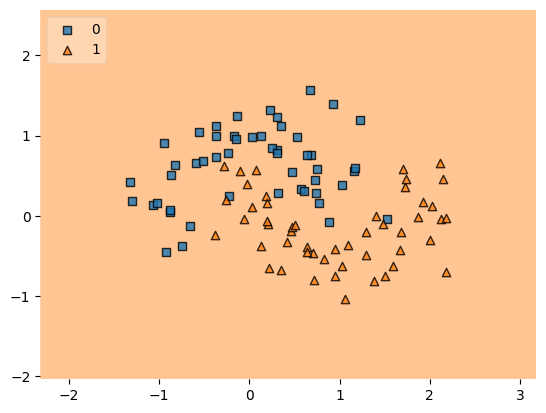

In [46]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model3, legend=2)

# Same as Tanh and Sigmoid activation function

# (c) Random Initialization

In [47]:
model4 = Sequential()

model4.add(Dense(2,activation='tanh',input_dim = 2))
model4.add(Dense(2,activation='tanh'))
model4.add(Dense(2,activation='tanh'))
model4.add(Dense(2,activation='tanh'))
model4.add(Dense(1,activation='sigmoid'))

model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
model4.get_weights()

[array([[-0.44984388,  1.0604492 ],
        [ 0.54223216,  1.0385803 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.95318854,  0.28254604],
        [ 0.8980862 , -0.6711682 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.2927574 ,  0.03355134],
        [-1.1509709 ,  0.5545038 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.46258307, 0.79200494],
        [0.7462454 , 0.81779563]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.4163276],
        [-1.0629826]], dtype=float32),
 array([0.], dtype=float32)]

In [49]:
initial_weights = model4.get_weights()

In [50]:
initial_weights[0] = np.random.randn(model4.get_weights()[0].shape[0],model4.get_weights()[0].shape[1])*0.01
initial_weights[1] = np.zeros(model4.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model4.get_weights()[2].shape[0],model4.get_weights()[2].shape[1])*0.01
initial_weights[3] = np.zeros(model4.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model4.get_weights()[4].shape[0],model4.get_weights()[4].shape[1])*0.01
initial_weights[5] = np.zeros(model4.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model4.get_weights()[6].shape[0],model4.get_weights()[6].shape[1])*0.01
initial_weights[7] = np.zeros(model4.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model4.get_weights()[8].shape[0],model4.get_weights()[8].shape[1])*0.01
initial_weights[9] = np.zeros(model4.get_weights()[9].shape)


In [51]:
model4.get_weights()

[array([[-0.44984388,  1.0604492 ],
        [ 0.54223216,  1.0385803 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.95318854,  0.28254604],
        [ 0.8980862 , -0.6711682 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.2927574 ,  0.03355134],
        [-1.1509709 ,  0.5545038 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.46258307, 0.79200494],
        [0.7462454 , 0.81779563]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.4163276],
        [-1.0629826]], dtype=float32),
 array([0.], dtype=float32)]

In [52]:
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
history = model4.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5023 - loss: 0.6851 - val_accuracy: 0.3000 - val_loss: 0.7192
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5398 - loss: 0.6768 - val_accuracy: 0.3000 - val_loss: 0.7161
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5266 - loss: 0.6777 - val_accuracy: 0.3000 - val_loss: 0.7130
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5289 - loss: 0.6762 - val_accuracy: 0.3000 - val_loss: 0.7099
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6086 - loss: 0.6686 - val_accuracy: 0.3500 - val_loss: 0.7068
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5891 - loss: 0.6726 - val_accuracy: 0.3500 - val_loss: 0.7037
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6031 - loss: 0.6720 - val_accuracy: 0.3500 - val_loss: 0.7007
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6187 - loss: 0.6615 - val_accuracy: 0.4500 - val_loss

In [54]:
model4.get_weights()

[array([[-0.6893693 ,  0.83671594],
        [ 0.8722555 ,  1.2408583 ]], dtype=float32),
 array([ 0.07876058, -0.14767805], dtype=float32),
 array([[ 1.2818987 ,  0.15237483],
        [ 0.6819429 , -0.35697243]], dtype=float32),
 array([-0.10933654,  0.17969888], dtype=float32),
 array([[ 0.60710377,  0.34962684],
        [-0.97377414,  0.69892853]], dtype=float32),
 array([-0.06834887,  0.01274659], dtype=float32),
 array([[0.63384825, 0.92641157],
        [1.0459161 , 1.0925347 ]], dtype=float32),
 array([ 0.0081353 , -0.00256798], dtype=float32),
 array([[-0.8002875],
        [-1.412515 ]], dtype=float32),
 array([0.00369176], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

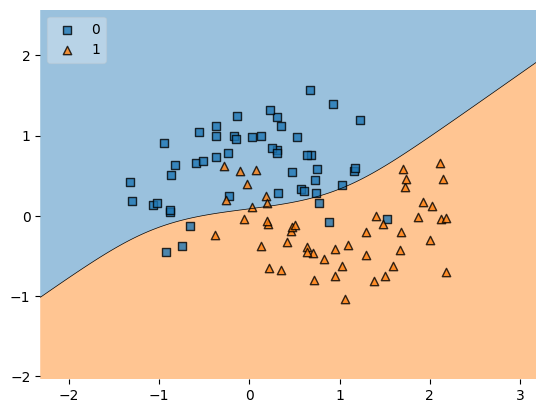

In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model4, legend=2)